In [1]:
# Python setup
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  

# seaborn settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette='winter')

In [2]:
# Instead of importing data, we will create our own data
df = pd.DataFrame({ 'name': pd.Categorical([ "Stefanie", "Petra", "Stefanie", 
                                             "Manuela", "Nadine", "Sophia",  
                                             "Ellen", "Emilia", "Lina", 
                                             "Marie", "Lena", "Mila",    
                                             "Ida", "Ella", "Pia", 
                                             "Sarah ", "Lia", "Lotta", 
                                             "Emma", "Lina"]),
                       'id': pd.Categorical(["1", "2", "3", "4", "5", "6",  
                                             "7", "8", "9", "10", "11", "12",    
                                             "13", "14", "15", "16 ", "17", "18", 
                                             "19", "20"]),
                          'height': np.array([162, 163, 163, 164, 164, 164, 164, 165, 
                                              165, 165, 165, 165, 165, 166, 166, 166,
                                              166, 167, 167, 168],dtype='int32'),
                  'height_parents': np.array([161, 163, 163, 165, 163, 164, 164, 165, 
                                              165, 165, 166, 167, 165, 166, 166, 166,
                                              166, 166, 167, 168],dtype='int32'),
                                    'gender': 'female' })

In [3]:
# show the first rows (i.e. head of the DataFrame)
df.head()

,name,id,height,height_parents,gender
0,Stefanie,1,162,161,female
1,Petra,2,163,163,female
2,Stefanie,3,163,163,female
3,Manuela,4,164,165,female
4,Nadine,5,164,163,female


In [4]:
# show last rows
df.tail()

,name,id,height,height_parents,gender
15,Sarah,16,166,166,female
16,Lia,17,166,166,female
17,Lotta,18,167,166,female
18,Emma,19,167,167,female
19,Lina,20,168,168,female


In [5]:
# data overview (with meta data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   name            20 non-null     category
 1   id              20 non-null     category
 2   height          20 non-null     int32   
 3   height_parents  20 non-null     int32   
 4   gender          20 non-null     object  
dtypes: category(2), int32(2), object(1)
memory usage: 2.0+ KB


In [6]:
# show all variables in the data set
df.columns

Index(['name', 'id', 'height', 'height_parents', 'gender'], dtype='object')

In [7]:
# show the lenght of the variable id (i.e. the number of observations)
len(df["id"])

20

In [8]:
# check for duplicates and print results (if the two numbers match, we have no duplicates)
# show the lenght of the variable id (i.e. the number of observations)
print('IDs:', len(df["id"]))
# count the number of individual id's
print('Unique IDs:', len(df["id"].value_counts()))

IDs: 20
Unique IDs: 20


In [9]:
# we don't need the variable gender 
df = df.drop('gender', axis=1)

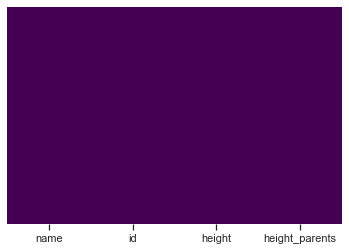

In [10]:
# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [11]:
print(df.isnull().sum())

name              0
id                0
height            0
height_parents    0
dtype: int64


In [12]:
# summary statistics for all numerical columns
round(df.describe(),2)

,height,height_parents
count,20.00,20.00
mean,165.00,165.05
std,1.49,1.67
min,162.00,161.00
25%,164.00,164.00
50%,165.00,165.00
75%,166.00,166.00
max,168.00,168.00


In [13]:
# summary statistics for all categorical columns
df.describe(include=['category'])

,name,id
count,20,20
unique,18,20
top,Stefanie,9
freq,2,1


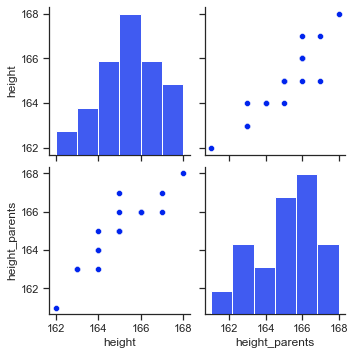

In [14]:
# histogram with seaborn
sns.pairplot(data=df);

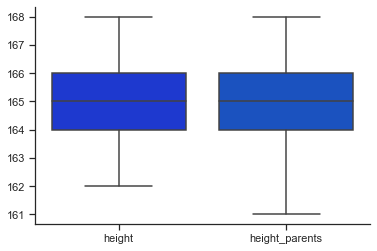

In [15]:
# boxplot
sns.boxplot(data=df);

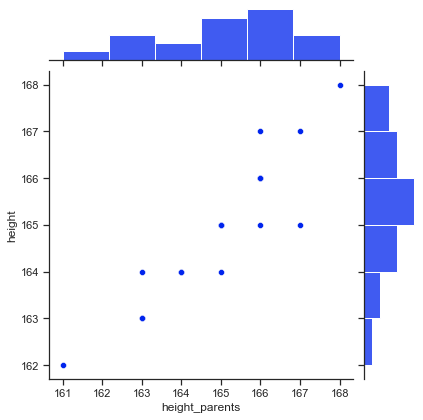

In [16]:
# check relationship with a joint plot
sns.jointplot(x="height_parents", y="height", data=df);

In [17]:
# calculate the mean 
df["height"].mean()

165.0

In [18]:
# add the mean (we call it "average") to our DataFrame
df = df.assign(average = df["height"].mean())

df.head()

,name,id,height,height_parents,average
0,Stefanie,1,162,161,165.0
1,Petra,2,163,163,165.0
2,Stefanie,3,163,163,165.0
3,Manuela,4,164,165,165.0
4,Nadine,5,164,163,165.0


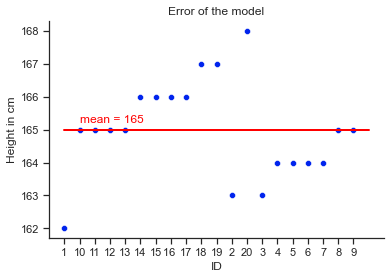

In [19]:
# create a scatterplot (plt)
plt = sns.scatterplot(x="id", y="height",data=df);

# labels and title
plt.set(xlabel='ID', ylabel='Height in cm', title='Error of the model');

# add our model 
plt.plot([0, 20], [165, 165], linewidth=2, color='r');
plt.text(1, 165.2,'mean = 165', rotation=0, color='r');

In [20]:
# fit linear model with statsmodels.formula.api
lm = smf.ols(formula ='height ~ height_parents', data=df).fit()

# add the regression predictions (as "pred") to our DataFrame
df['pred'] = lm.predict()

In [21]:
df.head(5)

,name,id,height,height_parents,average,pred
0,Stefanie,1,162,161,165.0,161.711048
1,Petra,2,163,163,165.0,163.335222
2,Stefanie,3,163,163,165.0,163.335222
3,Manuela,4,164,165,165.0,164.959396
4,Nadine,5,164,163,165.0,163.335222


In [22]:
# summary of regression results
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     88.78
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           2.21e-08
Time:                        22:09:03   Log-Likelihood:                -17.995
No. Observations:                  20   AIC:                             39.99
Df Residuals:                      18   BIC:                             41.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         30.9651     14.226      2.177      0.043       1.077      60.853
height_parents     0.8121      0.086      9.422      0.000       0.631       0.993
==============================================================================
Omnibus:                        4.700   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                2.492
Skew:                          -0.684   Prob(JB):                        0.288
Kurtosis:                       4.058   Cond. No.                     1.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# This is just a simple example of how regression works.

# our parameters
b_0 = 30.9651
b_1 = 0.8121

# Make a prediction for X=200
X = 200

prediction = b_0 + b_1*(X)

print(round(prediction,2))

193.39


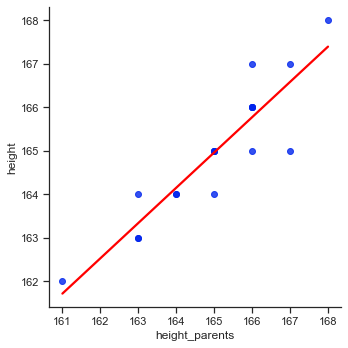

In [24]:
# Plot regression line 
sns.lmplot(x='height_parents', y='height', data=df, line_kws={'color':'red'}, height=5, ci=None);

In [25]:
# calculate error (observation - average) and assign it to dataframe
df = df.assign(error = (df['height'] - df['average']))
df.head(5)

,name,id,height,height_parents,average,pred,error
0,Stefanie,1,162,161,165.0,161.711048,-3.0
1,Petra,2,163,163,165.0,163.335222,-2.0
2,Stefanie,3,163,163,165.0,163.335222,-2.0
3,Manuela,4,164,165,165.0,164.959396,-1.0
4,Nadine,5,164,163,165.0,163.335222,-1.0


In [26]:
# calculate the sum of the errors 
df.error.sum()

0.0

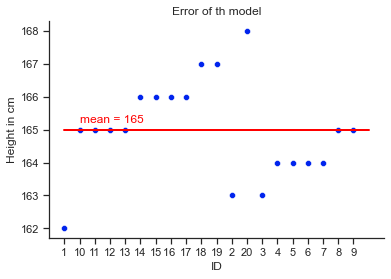

In [27]:
# create a scatterplot (plt)
plt = sns.scatterplot(x="id", y="height",data=df,);
plt.set(xlabel='ID', ylabel='Height in cm', title='Error of th model');
plt.plot([0, 20], [165, 165], linewidth=2, color='r');
plt.text(1, 165.2,'mean = 165', rotation=0, color='r');

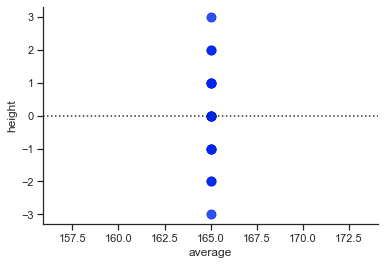

In [28]:
# residual plot
sns.residplot(x="average", y="height", data=df, scatter_kws={"s": 80});

In [29]:
# calculate squared error and assign it to dataframe
df = df.assign(error_sq = (df['height'] - df['average'])**2)
df.head(5)

,name,id,height,height_parents,average,pred,error,error_sq
0,Stefanie,1,162,161,165.0,161.711048,-3.0,9.0
1,Petra,2,163,163,165.0,163.335222,-2.0,4.0
2,Stefanie,3,163,163,165.0,163.335222,-2.0,4.0
3,Manuela,4,164,165,165.0,164.959396,-1.0,1.0
4,Nadine,5,164,163,165.0,163.335222,-1.0,1.0


In [30]:
# calculate sum of squared error (which is in case of the mean the total error)
TSS = df.error_sq.sum()
# print output
print('Sum of squared error (TSS) of model 1:', TSS)

Sum of squared error (TSS) of model 1: 42.0


In [31]:
lm.resid.sum()

4.206412995699793e-12

In [32]:
# obtain the residuals from statsmodel (resid)
df['error_2'] = lm.resid
# square the residuals 
df['error_sq_2'] = df['error_2']**2
# show df
df.head(5)

,name,id,height,height_parents,average,pred,error,error_sq,error_2,error_sq_2
0,Stefanie,1,162,161,165.0,161.711048,-3.0,9.0,0.288952,0.083493
1,Petra,2,163,163,165.0,163.335222,-2.0,4.0,-0.335222,0.112374
2,Stefanie,3,163,163,165.0,163.335222,-2.0,4.0,-0.335222,0.112374
3,Manuela,4,164,165,165.0,164.959396,-1.0,1.0,-0.959396,0.920440
4,Nadine,5,164,163,165.0,163.335222,-1.0,1.0,0.664778,0.441930


In [33]:
# Total sum of squares (TSS: sum of squared errors of the base model, i.e. the mean)
print(TSS)

42.0


In [34]:
# Sum of squared residuals (SS_R)
SSR = df['error_sq_2'].sum()
print(SSR)
# SSR – Sum of squared residuals from statsmodel function
lm.ssr

7.0802644003777155


7.080264400377715

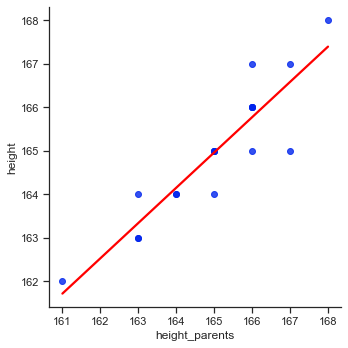

In [35]:
# Plot regression line 
sns.lmplot(x='height_parents', y='height', data=df, line_kws={'color':'red'}, height=5, ci=None);

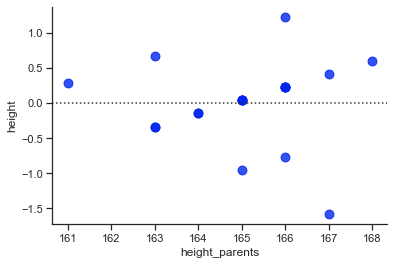

In [36]:
sns.residplot(x="height_parents", y="height", data=df, scatter_kws={"s": 80});

In [37]:
# Explained sum of squares  (SS_M = TSS - SS_R)
SSM = TSS - SSR
print(SSM)
# Explained sum of squres (SS_M) from statsmodel function
lm.ess

34.919735599622285


34.919735599622285

In [38]:
# R_Squared: explained sum of squared residuals
R_squared = SSM / TSS
print(R_squared)

0.831422276181483


In [39]:
# R_Squared of statsmodel
lm.rsquared

0.831422276181483

In [40]:
# Adjusted R_Squared: 
lm.rsquared_adj

0.8220568470804543

In [41]:
# correlation coefficient r
r = np.sqrt(R_squared)
print(r)

0.911823599267689


In [42]:
# correlation coefficient with p-value
stats.pearsonr(df['height'], df['height_parents'])

(0.9118235992676889, 2.2144128916549524e-08)

In [43]:
# calculate variance of the model mean
# Number of obeservations (lenght of DataFrame)
n = len(df["height"])
# calculate 
variance = (TSS/(n-1))
# print output
print('variance of the mean:', variance)

variance of the mean: 2.210526315789474


In [44]:
# obtain the standard deviation
print(f'Standard deviation (SD) of model 1 = {round(np.sqrt(variance),2)}')

Standard deviation (SD) of model 1 = 1.49


In [45]:
# Total MSE_T (this is the MSE of the basline mean model) from statsmodel
MSE_T = lm.mse_total
# print output
print('Total mean squared error (MSE_T):', MSE_T)
# compare this result to mse... they are the same

Total mean squared error (MSE_T): 2.210526315789474


In [46]:
# Mean squared error of residuals (MSE_R)
MSE_R = SSR / (20-2)
print('Mean squared error of residuals (MSE_R):', MSE_R)
# MSE of residuals from statsmodel (preferred)
print(f'Mean squared error od residuals (MSE_R): {lm.mse_resid}')

Mean squared error of residuals (MSE_R): 0.3933480222432064
Mean squared error od residuals (MSE_R): 0.39334802224320636


In [47]:
# the standard deviation equals the root of the MSE_R
print(f'Standard deviation (SD) of model 2 = {round(np.sqrt(MSE_R),2)}')

Standard deviation (SD) of model 2 = 0.63


In [48]:
# Mean squared error of the model (MSE_M)
p = 1 # we only have one predictor (height_parents)
MSM = (SSM / p)
print('MSM =', MSM)
# MSE_M of residuals from statsmodel
print(f'MS_M = {lm.mse_model}')

MSM = 34.919735599622285
MS_M = 34.919735599622285


In [49]:
# Adjust notation and calculate F-value
MSR = MSE_R
# F-value
F_value = (MSM / MSR)
print(F_value)

88.77567351293678


In [50]:
# statsmodel
# Alternative way to obtain F-value (preferred)
print(lm.fvalue)
# which of course equals
F_val = (lm.mse_model / lm.mse_resid)
print(F_val)

88.77567351293679
88.77567351293679


In [51]:
# calculate standard error (...we ignore the fact that our sample is small since n < 30) 
se = df['height'].sem()
print(se)
# assign se to df
df = df.assign(se=se)

0.33245498310218435


In [52]:
# alternative way to calculate standard error (se)
# calculate standard deviation (s)
s = df["height"].std()
# calculate se
se = (s/np.sqrt(n))
print(se)

0.33245498310218435


In [53]:
# Get standard error of parameters
se_2 = lm.bse
print('Standard error (SE) od model 2:', se_2)

Standard error (SE) od model 2: Intercept         14.226306
height_parents     0.086190
dtype: float64


In [54]:
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,30.9651,14.226,2.177,0.043,1.077,60.853
height_parents,0.8121,0.086,9.422,0.000,0.631,0.993


In [55]:
model_result = pd.read_html(lm.summary().tables[1].as_html(),header=0,index_col=0)[0]

t_statistic = model_result['coef'].values[1] / model_result['std err'].values[1]

print("t-statistic:", t_statistic)

t-statistic: 9.443023255813955


In [56]:
# calculate z-scores
z = stats.zscore(df.height)
print(z)
# assign z-scores to df
df = df.assign(z = z)

0    -2.070197
1    -1.380131
2    -1.380131
3    -0.690066
4    -0.690066
5    -0.690066
6    -0.690066
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.690066
14    0.690066
15    0.690066
16    0.690066
17    1.380131
18    1.380131
19    2.070197
Name: height, dtype: float64


/Users/jankirenz/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


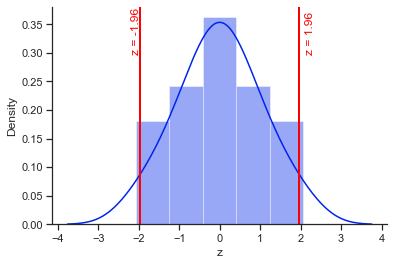

In [57]:
plt = sns.distplot(df.z);
# draw a vertical line
plt.axvline(1.96, 0, 1, linewidth=2, color='r');
# add text
plt.text(2.1, 0.3,'z = 1.96', rotation=90, color='r');
plt.axvline(-1.96, 0, 1, linewidth=2, color='r');
plt.text(-2.2, 0.3,'z = -1.96', rotation=90, color='r');

In [58]:
# lower boundary
lb = (df.height.mean() - (1.96*se))
# upper boundary
up = (df.height.mean() + (1.96*se))
print('Lower boundary of CI', lb)
print('Upper boundary of CI', up)

Lower boundary of CI 164.34838823311972
Upper boundary of CI 165.65161176688028


/Users/jankirenz/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


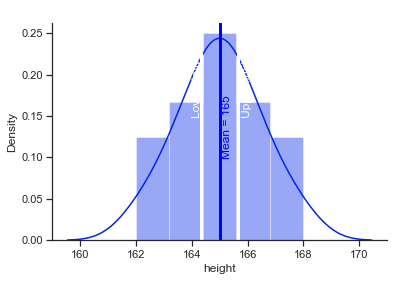

In [59]:
# draw limits of confidence intervall
plt = sns.distplot(df.height);
# draw a vertical line to mark the mean 
plt.axvline(165, 0, 1, linewidth=3, color='b');
# add text
plt.text(165.1, 0.1,'Mean = 165', rotation=90, color='b');
# draw a vertical line to mark the lower limit of the confidence intervall
plt.axvline(164.348388, 0, 1, linewidth=3, color='w');
# add text
plt.text(164, 0.15,'Lower limit = 164.34 ', rotation=90, color='w');
# draw a vertical line to mark the upper limit of the confidence intervall
plt.axvline(165.651612, 0, 1, linewidth=3, color='w');
plt.text(165.8, 0.15,'Upper limit = 165.65', rotation=90, color='w');

In [60]:
# Obtain confidence interval for fitted parameters 
lm.conf_int(alpha=0.05)

,0,1
Intercept,1.076702,60.853420
height_parents,0.631009,0.993165


In [61]:
# Make a prediction for height when parents average height is 168 cm
to_predict = pd.DataFrame({'height_parents':[168]})
results = lm.get_prediction(to_predict)
round(results.summary_frame(alpha=0.05),2)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,167.4,0.29,166.79,168.01,165.94,168.85


/Users/jankirenz/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


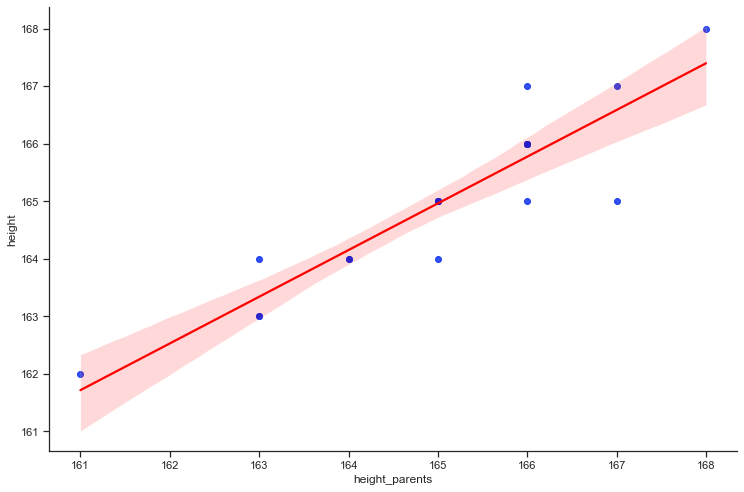

In [62]:
# Plot regression line with CI 95%
sns.lmplot(x='height_parents', y='height', data=df, order=1, line_kws={'color':'red'}, size=7, aspect=1.5, ci=95);

In [63]:
# calculate t-statistic
# 95% confidence interval, two tailed test, 
# p<0.05 (we need to take 0.025 at each side), n=20, df=19
t = stats.t.ppf(1-0.025, 19)
print(t)
# lower boundary
lb_t = (df.height.mean() - (t*se))
# upper boundary
up_t = (df.height.mean() + (t*se))
print('Lower boundary of CI (t-statistics)', lb_t)
print('Upper boundary of CI (t-statistics)', up_t)

2.093024054408263
Lower boundary of CI (t-statistics) 164.30416372335924
Upper boundary of CI (t-statistics) 165.69583627664076


/Users/jankirenz/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


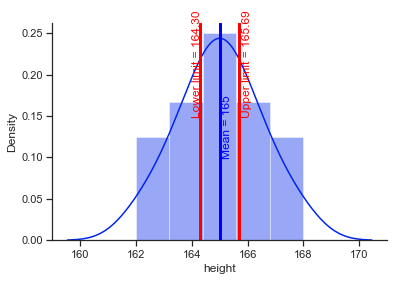

In [64]:
# draw limits of confidence intervall for t-statistic
plt = sns.distplot(df.height);
# draw a vertical line to mark the mean 
plt.axvline(165, 0, 1, linewidth=3, color='b');
# add text
plt.text(165.1, 0.1,'Mean = 165', rotation=90, color='b');
# draw a vertical line to mark the lower limit of the confidence intervall
plt.axvline(164.304164, 0, 1, linewidth=3, color='r');
# add text
plt.text(164, 0.15,'Lower limit = 164.30 ', rotation=90, color='r');
# draw a vertical line to mark the upper limit of the confidence intervall
plt.axvline(165.695836, 0, 1, linewidth=3, color='r');
plt.text(165.8, 0.15,'Upper limit = 165.69', rotation=90, color='r');

/Users/jankirenz/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


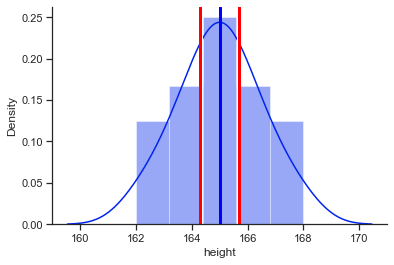

In [65]:
# compare CI z-statistic with t-statistic
# draw limits of confidence intervall
plt = sns.distplot(df.height);
# draw a vertical line to mark the mean 
plt.axvline(165, 0, 1, linewidth=3, color='b');
# add text
# draw vertical lines to mark the lower/upper limit of the confidence intervall (z)
plt.axvline(164.348388, 0, 1, linewidth=3, color='w');
plt.axvline(165.651612, 0, 1, linewidth=3, color='w');
# draw vertical lines to mark the lower/upper limit of the confidence intervall (t)
plt.axvline(164.304164, 0, 1, linewidth=3, color='r');
plt.axvline(165.695836, 0, 1, linewidth=3, color='r');

In [66]:
# BIC
lm.bic

41.980585438104086

In [67]:
# AIC
lm.aic

39.989120890996105